Represent the altitudes from a list of GPX files on a map.

In [1]:
import os
import glob
import logging
import cmocean
import geojson
import numpy as np
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import GPX_functions
plt.style.use('dark_background')

# User inputs

Define the directory where the files are stored and where the html will be written.

In [19]:
gpxdir = '/data/GPX/GranCanaria/20*/'
gpxbasename = '*.gpx'
gpxfilelist = sorted(glob.glob(os.path.join(gpxdir, gpxbasename)))
figdir = '/data/GPX/figures/' 
figname = "_".join(('GCtrackall', datetime.datetime.now().strftime("%Y%m%d"))) 
len(gpxfilelist)

302

## Gran Canaria

Initialise the map

In [10]:
coordinates = (-15.9, -15.3, 27.7, 28.2)
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='f')

Loop on the files

In [21]:
cmap = cmocean.cm.solar
cmap = plt.cm.inferno
coordsall = []
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax
for gpxfiles in gpxfilelist:

    #print gpxfiles
    lon, lat, ele, time = GPX_functions.read_gpx(gpxfiles)
    llon, llat = m(lon, lat)
    if ele:
        plt.scatter(llon, llat, s=1, c=ele, edgecolor='None', 
                    cmap=cmap, vmin=0., vmax=1900., zorder=3)
    else: 
        plt.plot(llon, llat, 'w', linewidth=0.5, zorder=3)

cbar = plt.colorbar(extend='max', shrink=.8)
cbar.set_label('Altitude\n(m)', rotation=0, ha='left')
m.drawcoastlines()
m.fillcontinents(color='.2', zorder=2)

m.drawparallels(np.arange(coordinates[2], coordinates[3], .2), linewidth=0.2,
                labels=[1, 0, 0, 0], fontname='Times New Roman', fontsize=16, zorder=1)
m.drawmeridians(np.arange(coordinates[0], coordinates[1], .2), linewidth=0.2,
                labels=[0, 0, 0, 1], fontname='Times New Roman', fontsize=16, zorder=1)

plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
# plt.show()    
plt.close()

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


## Valleseco only

In [65]:
gpxdir = '/home/ctroupin/Projects/ctroupin.github.io/_maps/maps/GPX/GranCanaria/2020/'
shapefile = "../data/GranCanaria/Valleseco2.geojson"
gpxbasename = 'Phase*/*.gpx'
gpxfilelist = sorted(glob.glob(os.path.join(gpxdir, gpxbasename)))
figname = "_".join(('VallesecoRunning', datetime.datetime.now().strftime("%Y%m%d"))) 
len(gpxfilelist)

43

### Read limits (geojson)

In [50]:
with open(shapefile) as f:
    gj = geojson.load(f)
features = gj['features'][0]
coords = features["geometry"]["coordinates"][0]
lonv, latv = [c[0] for c in coords], [c[1] for c in coords]

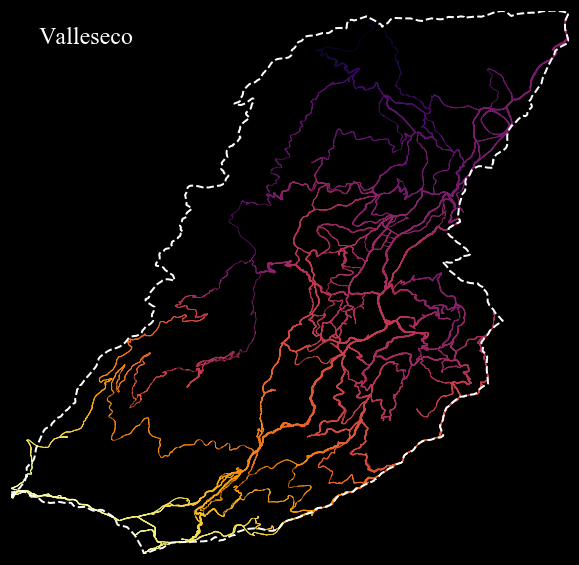

In [71]:
coordsall = []
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for gpxfiles in gpxfilelist:

    #print gpxfiles
    lon, lat, ele, time = GPX_functions.read_gpx(gpxfiles)
    plt.scatter(lon, lat, s=1, c=ele, edgecolor='None', 
                    cmap=cmap, vmin=500., vmax=1700., zorder=3)
    
plt.plot(lonv, latv, color="w", linestyle="--", linewidth=2, zorder=4)
plt.xlim(np.array(lonv).min(), np.array(lonv).max())
plt.ylim(np.array(latv).min(), np.array(latv).max())

plt.xticks([])
plt.yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.text(0.05, 0.95, 'Valleseco',  horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color="w", fontsize=24)
#plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
plt.show()    
plt.close()